# Exercises

---
### 5.2.1 Exercise
Calculate the GC-content in the following sequence:
```
GATTACCACTCACTGACTCACTGACACGAGACCTATACATGATCGCCGGATGATACGAGAATTACTGACGACTAATCCCGGATACTGCATACACTGACGACGACT
```
- Use the `.count()` method as shown above
- Search through Bio.SeqUtils for a function that might help you

In [ ]:
ex_seq = Seq("GATTACCACTCACTGACTCACTGACACGAGACCTATACATGATCGCCGGATGATACGAGAATTACTGACGACTAATCCCGGATACTGCATACACTGACGACGACT", IUPAC.unambiguous_dna)


--- 
### 5.3.1 Exercise
Can you concatenate the following sequences using a for-loop?
- Seq("ACGT", generic_dna)
- Seq("GCTA", generic_dna)
- Seq("TACG", generic_dna)

## 5.7 Identifying open reading frames

Identifying genes is possible by looking for open reading frames (ORFs). For eukaryotic genes we know that there is a complex interaction between promotors, start codons, exons and introns. Nonetheless, for prokaryotic and virus genes this approach would still be useful. 

Depending on the organism you also need to use the according codon table. In this example we're using a bacterial plasmid fasta file for which we need to use codon [table 11](https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi#SG11). By using the following block of code, we will store the sequence in the variable `record`, define the tranlate tables and define that a possible protein needs to be of a minimum length of 100 AA's. 


In [1]:
from Bio import SeqIO
record = SeqIO.read("data/NC 005816.fna", "fasta")
table = 11
min_pro_len = 100

The output might look something like this: 
```
GCLMKKSSIVATIITILSGSANAASSQLIP...YRF, - length 315, strand 1, frame 0
KSGELRQTPPASSTLHLRLILQRSGVMMEL...NPE, - length 285, strand 1, frame 1
NQIQGVICSPDSGEFMVTFETVMEIKILHK...GVA, - length 355, strand 1, frame 2
QGSGYAFPHASILSGIAMSHFYFLVLHAVK...CSD, - length 114, strand -1, frame 0
```

You could easily edit the above loop based code to build up a list of the candidate proteins, or convert this to a list comprehension. 

---
### 6.1.1 Exercise
Find the title of all the articles related to the genbank entry 'NC_005816'. Import this file using the following block of code.  

Extra: Create a list of URL-links that brings you directly to the article. For this you can use the Pubmed ID in combination with `https://pubmed.ncbi.nlm.nih.gov/`. 


Hint: look at the section of *references* of [this link](https://biopython.readthedocs.io/en/latest/chapter_seq_annot.html)

In [ ]:
from Bio import SeqIO
record = SeqIO.read("data/NC_005816.gb","gb")

--- 
### 7.1.1 Exercise
Return a list that contains the organism of each record in the `data/ls_orchid.gbk`-file. 

Tip: you should make an empty list, iterate over all the records, access the organism and append it to the  list. 

In [ ]:
from Bio import SeqIO

In [ ]:
from Bio.Blast import NCBIWWW
result_handle = NCBIWWW.qblast("blastn", "nt", 'GCGCCAGGTTCCACACGAACGTGCGTTCAACGTGACGGGCGAGAGGGCGG')

## 20.1.6 Simple quality filtering for FASTQ files
## 20.1.7 Trimming off primer sequences
## 20.1.8 Trimming off adaptor sequences
## 20.2.1 Histogram of sequence lengths



## Diagnosing Sickle Cell Anemia

Your goal is to develop an experimental test that reveals whether a patient suffers from the hereditary disease sickle cell anemia. The test for diagnosis should use a restriction enzyme on a patients’ DNA sample. For the test to work, you need to know exactly what genetic difference to test against. In this tutorial, you will use Biopython to find out.

The idea is to compare DNA and protein sequences of sickle cell and healthy globin, and to try out different restriction enzymes on them.

This tutorial consists of four parts:

1. Use the module Bio.Entrez to retrieve DNA and protein sequences from NCBI databases.
2. Use the module Bio.SeqIO to read, write, and filter information in sequence files.
3. Use the modules Bio.Seq and Bio.SeqRecord to extract exons, transcribe and translate them to protein sequences.
4. Use the module re to identify restriction sites.

# 1. Retrieving DNA and protein sequences with Bio.Entrez
## 1.1 Search identifiers on NCBI
Write Python code that searches for the cDNA sequence of the sickle cell globin protein from NCBI. Use the Entrez.esearch function. As keywords, use:
```sickle AND homo sapiens AND globin NOT chromosome ``` 
Print the resulting database identifiers (not the full sequences). 
Use the NCBI examples from the previous chapter. 


In [32]:
from Bio import Entrez
Entrez.email = 'A.N.Other@example.com'
# use retmax parameter to limit the maximal number of sequences to extract. 
handle = Entrez.esearch(db="nucleotide", term="sickle AND homo sapiens AND globin NOT chromosome")
records = Entrez.read(handle)
identifiers = records['IdList']
counts = records['Count']

In [4]:
identifiers

['1868032479', '1515564438', '179408', '224959855', '2168937', '183859', '183844']

In [14]:
counts

'7'

## 1.2 Retrieve sequences using identifiers
Use the identifiers from task 1.1, retrieve the full sequence with the `Entrez.efetch` function from the NCBI server.

The parameter rettype should be 'fasta', retmode should be 'xml'.

Print the identifier and define for each entry using a for loop. You can see the available fields for a single record with:

print(r.keys())

In [5]:
Entrez.email = 'A.N.Other@example.com'
with Entrez.efetch(db="nucleotide", id=identifiers, rettype='fasta', retmode='xml') as handle:
    # To read entries from a text/sdtring:
    #seqs = handle.read()
    # To read records from XML entries:
    records = Entrez.read(handle)

In [6]:
print(records)

[{'TSeq_seqtype': StringElement('', attributes={'value': 'nucleotide'}), 'TSeq_accver': 'MN609913.1', 'TSeq_taxid': '9606', 'TSeq_orgname': 'Homo sapiens', 'TSeq_defline': 'Homo sapiens A-gamma globin (HBG1) gene, exon 1 and partial cds', 'TSeq_length': '318', 'TSeq_sequence': 'CAATAGCCTTGACAAGGCAAACTTGACCAATAGTCTTAGAGTATCCAGTGAGGCCAGGGGCCGGCGGCTGGCTAGGGATGAAGAATAAAAGGAAGCACCCTTCAGCAGTTCCACACACTCGCTTCTGGAACGTCTGAGATTATCAATAAGCTCCTAGTCCAGACGCCATGGGTCATTTCACAGAGGAGGACAAGGCTACTATCACAAGCCTGTGGGGCAAGGTGAATGTGGAAGATGCTGGAGGAGAAACCCTGGGAAGGTAGGCTCTGGTGACCAGGACAAGGGAGGGAAGGAAGGACCCTGTGCCTGGCAAAAGTC'}, {'TSeq_seqtype': StringElement('', attributes={'value': 'nucleotide'}), 'TSeq_accver': 'MH580289.1', 'TSeq_taxid': '9606', 'TSeq_orgname': 'Homo sapiens', 'TSeq_defline': 'Homo sapiens voucher ATGLAB 2018103 hemoglobin beta subunit (HBB) gene, exon 3 and partial cds', 'TSeq_length': '881', 'TSeq_sequence': 'GTGCTTATTTGCATATTCATAATCTCCCTACTTTATTTTCTTTTATTTTTAATTGATACATAATCATTATACATATTTATGGGTTAAAGT

In [7]:
for i in records:
    print(i['TSeq_accver'])
    print(i['TSeq_defline'])

MN609913.1
Homo sapiens A-gamma globin (HBG1) gene, exon 1 and partial cds
MH580289.1
Homo sapiens voucher ATGLAB 2018103 hemoglobin beta subunit (HBB) gene, exon 3 and partial cds
M25079.1
Human sickle cell beta-globin mRNA, complete cds
FJ766333.1
Homo sapiens A-gamma globin (HBG1) gene, promoter region
E00658.1
Part of DNA encoding beta-globin gene
M33706.1
Human hemoglobin DNA with a deletion causing Indian delta-beta thalassemia
M37467.1
Human hemoglobin-related sequence across the breakpoint for Indian delta-beta thalassemia


## 1.3 Retrieve a single GenBank entry
In the output of task 1.2, locate the cDNA of the sickle cell globin manually. Copy the identifier. Use the identifier to download the full GenBank entry only for that sequence with efetch. Print the entry.

The parameter rettype should be ‘gb’, retmodeshould be 'text'.



In [8]:
Entrez.email = 'A.N.Other@example.com'
with Entrez.efetch(db="nucleotide", id='M25079', rettype='gb', retmode='text') as handle:
    # To read entries from a text/sdtring:
    cds = handle.read()
print(cds)

LOCUS       HUMBETGLA                468 bp    mRNA    linear   PRI 27-APR-1993
DEFINITION  Human sickle cell beta-globin mRNA, complete cds.
ACCESSION   M25079
VERSION     M25079.1
KEYWORDS    .
SOURCE      Homo sapiens (human)
  ORGANISM  Homo sapiens
            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;
            Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;
            Catarrhini; Hominidae; Homo.
REFERENCE   1  (bases 1 to 468)
  AUTHORS   Marotta,C.A., Forget,B.G., Cohen-Solal,M. and Weissman,S.M.
  TITLE     Nucleotide sequence analysis of coding and noncoding regions of
            human beta-globin mRNA
  JOURNAL   Prog. Nucleic Acid Res. Mol. Biol. 19, 165-175 (1976)
   PUBMED   1019344
COMMENT     Original source text: Human sickle cell, cDNA to mRNA.
FEATURES             Location/Qualifiers
     source          1..468
                     /organism="Homo sapiens"
                     /mol_type="mRNA"
                     /db_xref="ta

In [9]:
cds

'LOCUS       HUMBETGLA                468 bp    mRNA    linear   PRI 27-APR-1993\nDEFINITION  Human sickle cell beta-globin mRNA, complete cds.\nACCESSION   M25079\nVERSION     M25079.1\nKEYWORDS    .\nSOURCE      Homo sapiens (human)\n  ORGANISM  Homo sapiens\n            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;\n            Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;\n            Catarrhini; Hominidae; Homo.\nREFERENCE   1  (bases 1 to 468)\n  AUTHORS   Marotta,C.A., Forget,B.G., Cohen-Solal,M. and Weissman,S.M.\n  TITLE     Nucleotide sequence analysis of coding and noncoding regions of\n            human beta-globin mRNA\n  JOURNAL   Prog. Nucleic Acid Res. Mol. Biol. 19, 165-175 (1976)\n   PUBMED   1019344\nCOMMENT     Original source text: Human sickle cell, cDNA to mRNA.\nFEATURES             Location/Qualifiers\n     source          1..468\n                     /organism="Homo sapiens"\n                     /mol_type="mRNA"\n           

## 1.4 Write an output file
Save the GenBank entry from task 1.3 to a file ‘sickle.gb’.

In [33]:
filename = "data/sickle.gb"
out_handle = open(filename, "w")
out_handle.write(cds)
out_handle.close()

## 1.5 Retrieve and write multiple GenBank entries
Combine esearch and efetch to retrieve entries for the gene sequences of the human globin family. Find appropriate keywords to limit the search to beta-globin and only complete coding sequences. Write the outcome to a file.



In [34]:
# search identifiers
handle = Entrez.esearch(db="nucleotide", term="beta-globin AND human AND complete cds NOT chromosome NOT thalassemia NOT zebra fish", retmax=150)
records = Entrez.read(handle)
print(records['Count'])
identifiers = records['IdList']
print(identifiers)

# retrieve sequence entries
handle = Entrez.efetch(db="nucleotide", id=identifiers, rettype="gb", retmode="text")
records = handle.read()
open("data/globins.gb", "w").write(records)

137
['1696834923', '1696834911', '1696834907', '1333950173', '1333950171', '1333950169', '1333950167', '1491828168', '1465231265', '1411295735', '1240501976', '1148299215', '1142724618', '1142721398', '1142720181', '1036032278', '1036031023', '973413026', '973413024', '413968625', '469476449', '469476446', '190336860', '156230554', '56971742', '183821', '177052', '45738207', '1418273', '432469', '432468', '432467', '432466', '432465', '432464', '432463', '432462', '432461', '432460', '432459', '432458', '432457', '432456', '432455', '432454', '432453', '179408', '164790', '21637364', '71727270', '71727268', '71727266', '71727264', '71727262', '71727260', '71727258', '71727256', '71727254', '71727252', '71727250', '71727248', '71727246', '71727244', '71727242', '71727240', '71727238', '71727236', '71727234', '71727232', '71727230', '71727228', '71727226', '71727224', '71727222', '71727220', '71727218', '71727216', '71727214', '71727212', '71727210', '71727208', '71727206', '71727204', '

1527323

## 1.6 Optional Exercises
- Save the retrieved entries to a single FASTA file.
- Save each of the beta-globin sequences to a separate GenBank file.
- Use Entrez to search 100 recent references related to malaria and sickle cell anemia on PubMed.

# 2. Bio.SeqIO
Reading, writing and filtering sequence files

## 2.1 Read a GenBank file
Read the ‘sickle.gb’ file from task 1.4 using the SeqIO.parse() function:

```python
from Bio import SeqIO

records = SeqIO.parse(filename, format)
```

The first parameter of parse() is the filename, the format is ‘genbank’. Print the records object.

To see the actual entries, use the next() function on records or process the records in a for loop:
```python
rec = next(records)
```

In [24]:
from Bio import SeqIO
records = SeqIO.parse("data/sickle.gb", format="genbank")
print(records)

for rec in records:
    print(rec)

<generator object parse at 0x00000188E5F7FB10>
ID: M25079.1
Name: HUMBETGLA
Description: Human sickle cell beta-globin mRNA, complete cds
Number of features: 2
/molecule_type=mRNA
/topology=linear
/data_file_division=PRI
/date=27-APR-1993
/accessions=['M25079']
/sequence_version=1
/keywords=['']
/source=Homo sapiens (human)
/organism=Homo sapiens
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
/references=[Reference(title='Nucleotide sequence analysis of coding and noncoding regions of human beta-globin mRNA', ...)]
/comment=Original source text: Human sickle cell, cDNA to mRNA.
Seq('ATGGTNCAYYTNACNCCNGTGGAGAAGTCYGCYGTNACNGCNCTNTGGGGYAAG...TTT', IUPACAmbiguousDNA())


## 2.2 Print information for one sequence
Use the dir() function on a single record object to find out what attributes it has.

Print the id, name and description of the sickle cell globin entry.

In [27]:
records = SeqIO.parse("data/sickle.gb", "genbank")
for rec in records:
    print(dir(rec))
    print(rec.id)
    print(rec.name)
    print(rec.description)

['__add__', '__bool__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__le___', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_per_letter_annotations', '_seq', '_set_per_letter_annotations', '_set_seq', 'annotations', 'dbxrefs', 'description', 'features', 'format', 'id', 'letter_annotations', 'lower', 'name', 'reverse_complement', 'seq', 'translate', 'upper']
M25079.1
HUMBETGLA
Human sickle cell beta-globin mRNA, complete cds


## 2.3 Write a FASTA file
Save the GenBank entry from task 2.1 to a FASTA file using the `SeqIO.write()` function:
```python
SeqIO.write(records, file, format)
```
The first parameter of write() is a list of sequence records, the second a file open for writing, and the third should be ‘fasta’.

In [35]:
from Bio import SeqIO

records = SeqIO.parse("data/sickle.gb", "genbank")
SeqIO.write(records, "data/sickle.fasta", "fasta")

1

## 2.4 Print information for multiple sequences
Print the id, name, and description of all human beta-globins.

Hint:
This is a great occasion to exercise string formatting, e.g. to obtain a tabular output:
```python
print(f"{'Ada':10s} {33:7d}")
```

In [39]:
from Bio import SeqIO
records = SeqIO.parse("data/globins.gb", "genbank")
for rec in records:
    print(f"ID: {rec.id}, Name: {rec.name}, Description: {rec.description}")


ID: MK816963.1, Name: MK816963, Description: Cloning vector pDN-D2irTNG5kwh, complete sequence
ID: MK816960.1, Name: MK816960, Description: Cloning vector pKF-D2irTNP2AG-T2APuroR-5kwh, complete sequence
ID: MK816959.1, Name: MK816959, Description: Cloning vector pDN-D2irTN2AG5kwh, complete sequence
ID: MF174873.1, Name: MF174873, Description: Synthetic construct clone pARVA_T-Ag, complete sequence
ID: MF174872.1, Name: MF174872, Description: Synthetic construct clone pARVA_EBNA-1c, complete sequence
ID: MF174871.1, Name: MF174871, Description: Synthetic construct clone pARVUS_GABRB3, complete sequence
ID: MF174870.1, Name: MF174870, Description: Synthetic construct clone pARVUS_GABRA1, complete sequence
ID: MG657341.1, Name: MG657341, Description: Homo sapiens hemoglobin subunit beta (HBB) gene, complete cds
ID: MG675219.1, Name: MG675219, Description: Homo sapiens hemoglobin subunit beta (HBB) gene, complete cds
ID: MH210859.1, Name: MH210859, Description: Cloning vector pLSB, complet

## 2.5 Filtering sequence entries
Print the same information as in task 2.4, but do not show non-globin entries. If the description contains either ‘vector’ or ‘isolate’, don’t print anything.

In [41]:
from Bio import SeqIO
records = SeqIO.parse("data/globins.gb", "genbank")
for rec in records:
    if not("vector" in rec.description or "isolate" in rec.description): 
        print(f"ID: {rec.id}, Name: {rec.name}, Description: {rec.description}")


ID: MF174873.1, Name: MF174873, Description: Synthetic construct clone pARVA_T-Ag, complete sequence
ID: MF174872.1, Name: MF174872, Description: Synthetic construct clone pARVA_EBNA-1c, complete sequence
ID: MF174871.1, Name: MF174871, Description: Synthetic construct clone pARVUS_GABRB3, complete sequence
ID: MF174870.1, Name: MF174870, Description: Synthetic construct clone pARVUS_GABRA1, complete sequence
ID: MG657341.1, Name: MG657341, Description: Homo sapiens hemoglobin subunit beta (HBB) gene, complete cds
ID: MG675219.1, Name: MG675219, Description: Homo sapiens hemoglobin subunit beta (HBB) gene, complete cds
ID: MF462285.1, Name: MF462285, Description: Synthetic construct clone NFAT-CBR red-shifted luciferase (CBR) gene, complete cds
ID: LT727607.1, Name: LT727607, Description: Vector pSP64GcHIL6, complete sequence
ID: AH002981.2, Name: AH002981, Description: Homo sapiens S100 protein beta subunit (S100-beta) gene, complete cds
ID: AH010109.2, Name: AH010109, Description: Ho

## 2.6 Optional Exercises
- Collect the entries matching all criteria in a new list
- Save the filtered list to a FASTA file
- Filter the list of sequence entries even further using your own criteria

---

# 3. Bio.Seq and Bio.SeqRecord
Working with sequences

## 3.1 The DNA sequence
Read the sequence of the sickle cell globin cDNA. Print the DNA sequence. Use the seq attribute of the SeqRecord object from the previous exercise:
```python
sequence = rec.seq
```

In [47]:
from Bio import SeqIO

# task 3.1
records = SeqIO.parse("data/sickle.gb", "genbank")
sickle = next(records)
print(dir(sickle))

print(sickle.id)
print(sickle.description)
print(sickle.seq)


['__add__', '__bool__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__le___', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_per_letter_annotations', '_seq', '_set_per_letter_annotations', '_set_seq', 'annotations', 'dbxrefs', 'description', 'features', 'format', 'id', 'letter_annotations', 'lower', 'name', 'reverse_complement', 'seq', 'translate', 'upper']
M25079.1
Human sickle cell beta-globin mRNA, complete cds
ATGGTNCAYYTNACNCCNGTGGAGAAGTCYGCYGTNACNGCNCTNTGGGGYAAGGTNAAYGTGGATGAAGYYGGYGGYGAGGCCCTGGGCAGNCTGCTNGTGGTCTACCCTTGGACCCAGAGGTTCTTNGANTCNTTYGGGGATCTGNNNACNCCNGANGCAGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCT

## 3.2 Transcribe DNA to RNA
Transcribe the sickle cell cDNA sequence to RNA and print it. Use the `transcribe()` method of the Seq object.


In [50]:
from Bio import Seq
seq = sickle.seq
rna = seq.transcribe()
print(rna)

AUGGUNCAYYUNACNCCNGUGGAGAAGUCYGCYGUNACNGCNCUNUGGGGYAAGGUNAAYGUGGAUGAAGYYGGYGGYGAGGCCCUGGGCAGNCUGCUNGUGGUCUACCCUUGGACCCAGAGGUUCUUNGANUCNUUYGGGGAUCUGNNNACNCCNGANGCAGUUAUGGGCAACCCUAAGGUGAAGGCUCAUGGCAAGAAAGUGCUCGGUGCCUUUAGUGAUGGCCUGGCUCACCUGGACAACCUCAAGGGCACCUUUGCCACACUGAGUGAGCUGCACUGUGACAAGCUNCAYGUGGAUCCUGAGAACUUCAGGCUNCUNGGCAACGUGYUNGUCUGYGUGCUGGCCCAUCACUUUGGCAAAGAAUUCACCCCACCAGUGCANGCNGCCUAUCAGAAAGUGGUNGCUGGUGUNGCUAAUGCCCUGGCCCACAAGUAUCACUAAGCUNGCYUUYUUGYUGUCCAAUUU


## 3.3 Translate RNA to protein
Translate the sickle cell RNA to a protein sequence and print it. Use the `translate()` method of a Seq object.

Save the protein sequence to a separate file.


In [76]:
from Bio import Seq
from Bio.Seq import Seq
seq = sickle.seq
rna = seq.transcribe()
prot = rna.translate()
str(prot)

'MVHXTPVEKSAVTALWGKVNVDEXGGEALGXLLVVYPWTQRFXXSFGDLXTPXAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVXVCVLAHHFGKEFTPPVXAAYQKVVAGVANALAHKYH*AXXXXVQF'

In [77]:
protfilename = "data/sickleprot.pep"
with open(protfilename, "w") as fh:
    fh.write(str(prot))

## 3.4 Analyze annotations of beta-globin
In the file with many globins, find the beta-globin entry with accession L26462. Use the field `r.annotations['accessions']` on a SeqRecord object to find it. Write the entry to a separate GenBank file.


In [78]:
rec.annotations['accessions']

['AJ318512']

In [83]:
from Bio import SeqIO
from Bio import SeqRecord
records = SeqIO.parse("data/globins.gb", "genbank")

num = 0
for rec in records:
    if 'L26462' in rec.annotations['accessions']:
        print(rec)
        SeqIO.write(rec, f'data/L26462_{num}.gb', "genbank")
        num += 1


ID: L26462.1
Name: HUMBETGLOA
Description: Human haplotype C4 beta-globin gene, complete cds
Number of features: 26
/molecule_type=DNA
/topology=linear
/data_file_division=PRI
/date=26-AUG-1994
/accessions=['L26462']
/sequence_version=1
/keywords=['beta-globin']
/source=Homo sapiens (human)
/organism=Homo sapiens
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
/references=[Reference(title='Molecular and population genetic analysis of allelic sequence diversity at the human beta-globin locus', ...)]
Seq('ACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTA...ATC', IUPACAmbiguousDNA())


## 3.5 Extract sequence features
Print all features of the L26462 entry. Use the field `r.features` on a SeqRecord object.

In [88]:
L26462 = SeqIO.parse('data/L26462_0.gb', 'gb')
globin = next(L26462)
for f in globin.features:
    print(f)

type: source
location: [0:3002](+)
qualifiers:
    Key: db_xref, Value: ['taxon:9606']
    Key: haplotype, Value: ['C4']
    Key: mol_type, Value: ['genomic DNA']
    Key: note, Value: ['sequence found in a Melanesian population']
    Key: organism, Value: ['Homo sapiens']

type: variation
location: [110:111](+)
qualifiers:
    Key: replace, Value: ['t']

type: variation
location: [262:263](+)
qualifiers:
    Key: note, Value: ['Rsa I polymorphism']
    Key: replace, Value: ['t']

type: variation
location: [272:273](+)
qualifiers:
    Key: replace, Value: ['c']

type: variation
location: [285:287](+)
qualifiers:
    Key: note, Value: ['2 bp insertion of AT']
    Key: replace, Value: ['']

type: variation
location: [287:288](+)
qualifiers:
    Key: replace, Value: ['t']

type: variation
location: [294:296](+)
qualifiers:
    Key: note, Value: ['1 bp deletion of C or 2 bp deletion of CT']
    Key: replace, Value: ['']

type: variation
location: [346:347](+)
qualifiers:
    Key: replace, 

In [90]:
L26462 = SeqIO.read('data/L26462_0.gb', 'gb')
for f in L26462.features:
    print(f)

type: source
location: [0:3002](+)
qualifiers:
    Key: db_xref, Value: ['taxon:9606']
    Key: haplotype, Value: ['C4']
    Key: mol_type, Value: ['genomic DNA']
    Key: note, Value: ['sequence found in a Melanesian population']
    Key: organism, Value: ['Homo sapiens']

type: variation
location: [110:111](+)
qualifiers:
    Key: replace, Value: ['t']

type: variation
location: [262:263](+)
qualifiers:
    Key: note, Value: ['Rsa I polymorphism']
    Key: replace, Value: ['t']

type: variation
location: [272:273](+)
qualifiers:
    Key: replace, Value: ['c']

type: variation
location: [285:287](+)
qualifiers:
    Key: note, Value: ['2 bp insertion of AT']
    Key: replace, Value: ['']

type: variation
location: [287:288](+)
qualifiers:
    Key: replace, Value: ['t']

type: variation
location: [294:296](+)
qualifiers:
    Key: note, Value: ['1 bp deletion of C or 2 bp deletion of CT']
    Key: replace, Value: ['']

type: variation
location: [346:347](+)
qualifiers:
    Key: replace, 

'variation'

## 3.6 Extract exons
Print all exon features and their attributes start, end and nofuzzy_start, nofuzzy_end:
```python
for feature in seq['features']:
    print(feature)
    ...
    # add printing attributes here
```
    
For each exon, extract the interval

```python
feature[nofuzzy_start:nofuzzy_end]
``` 

Use the indices to extract portions of the complete sequence. Concatenate all exon sequences to a single string.


In [93]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

# task 3.6
records = SeqIO.parse('data/L26462_0.gb', "genbank")
entry = next(records)

exon_seq = Seq('')
for f in entry.features:
    if f.type == 'exon':
        print(f.location)
        start = f.location.nofuzzy_start
        end = f.location.nofuzzy_end
        exon_seq += entry.seq[start:end]
print(exon_seq)

rec = [SeqRecord(exon_seq, 'L26462 exon sequence')]
SeqIO.write(rec, 'data/L26462_exon.fasta', 'fasta')

[<865:957](+)
[1087:1310](+)
[2160:>2289](+)
ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAA


1

## 3.7 Extract the beta-globin protein sequence
Transcribe and translate the concatenated exon sequence and print it.

In [102]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

# task 3.7
records = SeqIO.parse('data/L26462_exon.fasta', "fasta")
globin = next(records)

rna = globin.seq.transcribe()
print(rna)

protein = rna.translate()
print(protein)

AUGGUGCAUCUGACUCCUGAGGAGAAGUCUGCCGUUACUGCCCUGUGGGGCAAGGUGAACGUGGAUGAAGUUGGUGGUGAGGCCCUGGGCAGGCUGCUGGUGGUCUACCCUUGGACCCAGAGGUUCUUUGAGUCCUUUGGGGAUCUGUCCACUCCUGAUGCUGUUAUGGGCAACCCUAAGGUGAAGGCUCAUGGCAAGAAAGUGCUCGGUGCCUUUAGUGAUGGCCUGGCUCACCUGGACAACCUCAAGGGCACCUUUGCCACACUGAGUGAGCUGCACUGUGACAAGCUGCACGUGGAUCCUGAGAACUUCAGGCUCCUGGGCAACGUGCUGGUCUGUGUGCUGGCCCAUCACUUUGGCAAAGAAUUCACCCCACCAGUGCAGGCUGCCUAUCAGAAAGUGGUGGCUGGUGUGGCUAAUGCCCUGGCCCACAAGUAUCACUAA
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH*


In [103]:
# Shorter:
exons = SeqIO.read('data/L26462_exon.fasta', 'fasta')

beta_glob_prot = exons.seq.transcribe().translate()
print(beta_glob_prot)

MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH*


## 3.8 Results
Print the sickle cell and healthy beta-globin sequence in subsequent lines or a text file. Also print the two corresponding protein sequences in subsequent lines. What differences do you see?

In [106]:
from Bio import SeqIO

# task 3.9
records = SeqIO.parse('data/L26462_exon.fasta', "fasta")
globin = next(records)

records = SeqIO.parse('data/sickle.gb', "genbank")
sickle = next(records)

print(globin.seq[:70])
print(sickle.seq[:70])

print()

prot1 = globin.seq.transcribe().translate()
prot2 = sickle.seq.transcribe().translate()

print(prot1[:70])
print(prot2[:70])


ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAG
ATGGTNCAYYTNACNCCNGTGGAGAAGTCYGCYGTNACNGCNCTNTGGGGYAAGGTNAAYGTGGATGAAG

MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLG
MVHXTPVEKSAVTALWGKVNVDEXGGEALGXLLVVYPWTQRFXXSFGDLXTPXAVMGNPKVKAHGKKVLG


## 3.9 Optional Exercises
- What are the ‘N’ characters in the sickle cell globin cDNA? How did they affect the transcription/translation?
- Check in the documentation how to read an alignment of multiple sequences using Biopython
- Propose a PCR primer that specifically recognizes the sickle cell gene.

# 4. Proteins
Make a superimposed plot of two proteins

C:\Users\tuurm\Anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2192.
  PDBConstructionWarning)
C:\Users\tuurm\Anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2242.
  PDBConstructionWarning)
C:\Users\tuurm\Anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2287.
  PDBConstructionWarning)
C:\Users\tuurm\Anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2335.
  PDBConstructionWarning)


Structure exists: 'C:\Users\tuurm\OneDrive - VIB\Trainingen\Python for downstream data-analysis\21092020-materials\hh\1hho.cif' 


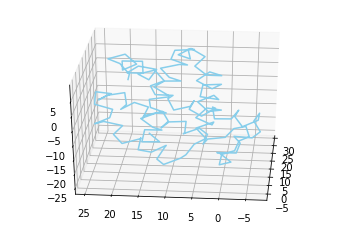

In [2]:
from Bio.PDB import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pdbl = PDBList()
pdbl.retrieve_pdb_file("1HHO")

parser = MMCIFParser()
struct = parser.get_structure("1HHO", "hh/1hho.cif")

# Part 1: Plot a structure
calphas = [res["CA"].get_coord() for res in struct[0]["A"] if "CA" in res]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([xyz[0] for xyz in calphas],
        [xyz[1] for xyz in calphas],
        [xyz[2] for xyz in calphas], color='skyblue')
ax.view_init(30, 185)
plt.show()

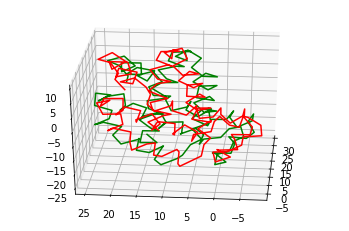

In [3]:
# Part 2: Plot an aligned pair of structures
chain_A = [res["CA"] for res in struct[0]["A"] if "CA" in res]
chain_B = [res["CA"] for res in struct[0]["B"] if "CA" in res][:141] # Explain superposition

sup = Superimposer()
sup.set_atoms(chain_A, chain_B)
sup.apply(chain_B)

calphas_A = [atom.get_coord() for atom in chain_A]
calphas_B = [atom.get_coord() for atom in chain_B]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([xyz[0] for xyz in calphas_A],
        [xyz[1] for xyz in calphas_A],
        [xyz[2] for xyz in calphas_A], color='green')
ax.plot([xyz[0] for xyz in calphas_B],
        [xyz[1] for xyz in calphas_B],
        [xyz[2] for xyz in calphas_B], color='red')
ax.view_init(30, 185)
plt.show()

In [4]:
pip install py3Dmol

Note: you may need to restart the kernel to use updated packages.


In [5]:
import py3Dmol
view1 = py3Dmol.view(query='pdb:1HHO')
view1.setStyle({'cartoon':{'color':'spectrum'}})
view1

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## References
- Example exercise from https://krother.gitbooks.io/biopython-tutorial/content/
- Example exercise from the BioPython Tutorial - Chapter 20: *Cookbook - Cool things to do with it*. 